Link github repo: https://github.com/NibuTake/PyDEA

Link docs: https://nibutake.github.io/PyDEA/index.html

In [ ]:
!pip install Pyfrontier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 19.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

from Pyfrontier.frontier_model import EnvelopDEA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
# Loading dataset in CSV format
df = pd.read_csv('Dataset.csv')

# Setting the 'dmu' column as the index
df.set_index('dmu', inplace=True)

df

,i_deviazionestandard,i_beta,i_commissionedingresso,o_rendimentoatteso
dmu,,,,
AcomeA_PMITALIA_ESG_A1,0.123,0.96,0.04,0.0694
Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,0.108,0.84,0.01,0.0664
Symphonia_Azionario_Small_Cap_Italia,0.124,0.66,0.04,0.0789
Algebris_Core_Italy_R_EUR_Acc,0.086,0.69,0.03,0.0878
Allianz_Azioni_Italia_All_Stars_A,0.128,0.99,0.02,0.0487
Amundi_Impegno_Italia_B,0.117,0.91,0.03,0.0489
Amundi_Sviluppo_Attivo_Italia_A,0.099,0.81,0.02,0.0539
Anima_Iniziativa_Italia_A,0.122,0.93,0.04,0.0579
Anima_Italia_A,0.129,0.97,0.04,0.0485


In [ ]:
# Applying the DEA model: CCR, input-oriented
dea = EnvelopDEA("CRS", "in")

# Running the fit with the dataset
dea.fit(
    df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].to_numpy(),
    df[["o_rendimentoatteso"]].to_numpy()
)

In [ ]:
# Displaying model data for each DMU

# Creating a list of dictionaries for each DMU
results = []

# Iterating over all DMU results
for i, result in enumerate(dea.result):
    # Saving the results of each DMU in a dictionary
    dmu_result = {
        "Efficiency Score": result.score,  # Efficiency score
    }
    results.append(dmu_result)

# Creating the DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)


# Setting the DataFrame index as the DMU names (assuming DMU names are in the index of df)
results_df.index = df.index

# Downloading the dataframe with data for each DMU
results_df.to_csv("DMU_efficiency.csv", index=True)
files.download("DMU_efficiency.csv")

results_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Punteggio di efficienza
dmu,
AcomeA_PMITALIA_ESG_A1,0.580745
Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,1.000000
Symphonia_Azionario_Small_Cap_Italia,0.803545
Algebris_Core_Italy_R_EUR_Acc,1.000000
Allianz_Azioni_Italia_All_Stars_A,0.536363
Amundi_Impegno_Italia_B,0.483238
Amundi_Sviluppo_Attivo_Italia_A,0.690706
Anima_Iniziativa_Italia_A,0.492031
Anima_Italia_A,0.403795


Numero totale di DMU: 52
Numero di DMU efficienti: 8
Numero di DMU inefficienti: 44


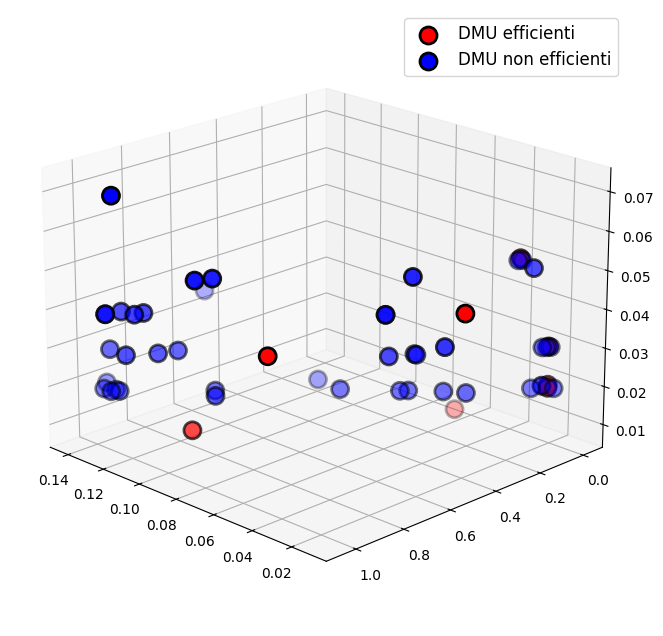

In [ ]:
# 3D graphical visualization of DMU efficiency

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting efficient and inefficient DMUs based on efficiency scores
eff_dmu = [r.dmu for r in dea.result if r.score == 1.0]  # Only DMUs with an efficiency score of 1
ineff_dmu = [r.dmu for r in dea.result if r.score != 1.0]  # DMUs with an efficiency score different from 1

# Checking the total number of DMUs
total_dmu = len(dea.result)
num_eff_dmu = len(eff_dmu)
num_ineff_dmu = len(ineff_dmu)

# Printing the number of DMUs
print(f"Total number of DMUs: {total_dmu}")
print(f"Number of efficient DMUs: {num_eff_dmu}")
print(f"Number of inefficient DMUs: {num_ineff_dmu}")

# Extracting values for automatic axis scaling
x_vals = [d.input[0] for d in eff_dmu + ineff_dmu]
y_vals = [d.input[1] for d in eff_dmu + ineff_dmu]
z_vals = [d.input[2] for d in eff_dmu + ineff_dmu]

# Scatter plot for efficient DMUs (blue with black border)
ax.scatter(
    [d.input[0] for d in eff_dmu],
    [d.input[1] for d in eff_dmu],
    [d.input[2] for d in eff_dmu],
    color="red", label="Efficient DMUs", marker="o", s=150, edgecolors="black", linewidths=2
)

# Scatter plot for inefficient DMUs (red with black border)
ax.scatter(
    [d.input[0] for d in ineff_dmu],
    [d.input[1] for d in ineff_dmu],
    [d.input[2] for d in ineff_dmu],
    color="blue", label="Inefficient DMUs", marker="o", s=150, edgecolors="black", linewidths=2
)

# Auto-scaling to avoid cuts
x1=ax.set_xlim([min(x_vals) - np.ptp(x_vals) * 0.1, max(x_vals) + np.ptp(x_vals) * 0.1])
x2=ax.set_ylim([min(y_vals) - np.ptp(y_vals) * 0.1, max(y_vals) + np.ptp(y_vals) * 0.1])
x3=ax.set_zlim([min(z_vals) - np.ptp(z_vals) * 0.1, max(z_vals) + np.ptp(z_vals) * 0.1])

# Setting transparent background
fig.patch.set_alpha(0)  # Transparent background for the entire figure
ax.set_facecolor((0, 0, 0, 0))  # Transparent background for the axes

# Setting the 3D view for better readability
ax.view_init(elev=20, azim=135)  # Modify these values if you want a different perspective

# Aesthetic improvements
ax.legend(fontsize=12)
ax.grid(True)  # Adding a light grid to aid readability

# Saving the image with a transparent background
plt.savefig("transparent_graph.png", dpi=300, bbox_inches="tight", transparent=True)

# Displaying the graph
plt.show()

In [ ]:
# Calculating efficient combinations for each DMU

# Creating an empty dataframe for efficient combinations
df_dmu_comb_eff = pd.DataFrame(columns=[f"{df.index[i]}" for i in range(len(dea.result))])

# Iterating over all DMU results
for i, result in enumerate(dea.result):
    # Extracting the lambda weights
    lambda_weights = result.weights

    # Creating a dictionary to store the weights of each DMU
    dmu_weights = {f"{j}": (lambda_weights[j] if lambda_weights[j] > 0 else 0) for j in range(len(lambda_weights))}

    # Adding the weights to the dataframe
    df_dmu_comb_eff.loc[i] = list(dmu_weights.values())

# Setting the DMU names as the dataframe index
df_dmu_comb_eff.index = df.index

df_dmu_comb_eff

,AcomeA_PMITALIA_ESG_A1,Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,Symphonia_Azionario_Small_Cap_Italia,Algebris_Core_Italy_R_EUR_Acc,Allianz_Azioni_Italia_All_Stars_A,Amundi_Impegno_Italia_B,Amundi_Sviluppo_Attivo_Italia_A,Anima_Iniziativa_Italia_A,Anima_Italia_A,Arca_Azioni_Italia_P,...,Carmignac_Portfolio_Patrimoine_Europe_A_EUR_Acc,Groupama_Bilanciato_-_NC,Eurizon_Bilanciato_Euro_Multimanager,Fideuram_Bilanciato,UBS_(Lux)_KSS_Eur_GrInc_€_P-acc,Fidelity_Funds_-_European_Multi_Asset_Income_Fund_A-Acc-EUR,Dpam_B_-_Balanced_Flexible_B,Groupama_Bilanciato_-_Ic,Investimenti_Bilanciati_Internazionali_A,Ubs_(lux)_Key_Selection_Sicav_-_European_Growth_And_Income_(eur)_Q-acc
dmu,,,,,,,,,,,,,,,,,,,,,
AcomeA_PMITALIA_ESG_A1,0.0,0.038082,0.0,0.761633,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Symphonia_Azionario_Small_Cap_Italia,0.0,0.000000,0.0,0.519613,0.0,0.0,0.0,0.0,0.0,0.0,...,0.187316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algebris_Core_Italy_R_EUR_Acc,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allianz_Azioni_Italia_All_Stars_A,0.0,0.466020,0.0,0.202235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amundi_Impegno_Italia_B,0.0,0.174283,0.0,0.425144,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amundi_Sviluppo_Attivo_Italia_A,0.0,0.362766,0.0,0.339549,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anima_Iniziativa_Italia_A,0.0,0.008066,0.0,0.653353,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anima_Italia_A,0.0,0.033098,0.0,0.527361,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculating the normalized composition for each DMU, given the same initial input

# Normalizing the rows: each value divided by the sum of the row
df_normalized_comb_eff = df_dmu_comb_eff.div(df_dmu_comb_eff.sum(axis=1), axis=0)

df_normalized_comb_eff.index = df.index

# Downloading the dataframe with efficient combinations for each DMU
df_normalized_comb_eff.to_csv("DMU_efficient_combinations_weights.csv", index=True)
files.download("DMU_efficient_combinations_weights.csv")

df_normalized_comb_eff

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,AcomeA_PMITALIA_ESG_A1,Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,Symphonia_Azionario_Small_Cap_Italia,Algebris_Core_Italy_R_EUR_Acc,Allianz_Azioni_Italia_All_Stars_A,Amundi_Impegno_Italia_B,Amundi_Sviluppo_Attivo_Italia_A,Anima_Iniziativa_Italia_A,Anima_Italia_A,Arca_Azioni_Italia_P,...,Carmignac_Portfolio_Patrimoine_Europe_A_EUR_Acc,Groupama_Bilanciato_-_NC,Eurizon_Bilanciato_Euro_Multimanager,Fideuram_Bilanciato,UBS_(Lux)_KSS_Eur_GrInc_€_P-acc,Fidelity_Funds_-_European_Multi_Asset_Income_Fund_A-Acc-EUR,Dpam_B_-_Balanced_Flexible_B,Groupama_Bilanciato_-_Ic,Investimenti_Bilanciati_Internazionali_A,Ubs_(lux)_Key_Selection_Sicav_-_European_Growth_And_Income_(eur)_Q-acc
dmu,,,,,,,,,,,,,,,,,,,,,
AcomeA_PMITALIA_ESG_A1,0.0,0.047619,0.0,0.952381,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Symphonia_Azionario_Small_Cap_Italia,0.0,0.000000,0.0,0.322139,0.0,0.0,0.0,0.0,0.0,0.0,...,0.116128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algebris_Core_Italy_R_EUR_Acc,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allianz_Azioni_Italia_All_Stars_A,0.0,0.697369,0.0,0.302631,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amundi_Impegno_Italia_B,0.0,0.290749,0.0,0.709251,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amundi_Sviluppo_Attivo_Italia_A,0.0,0.516529,0.0,0.483471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anima_Iniziativa_Italia_A,0.0,0.012195,0.0,0.987805,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anima_Italia_A,0.0,0.059055,0.0,0.940945,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Creating a dataframe with weighted inputs and outputs for the efficient combinations of each DMU

# Creating a list to store the new weighted inputs and outputs
inputs_dmu_efficienti = []
outputs_dmu_efficienti = []

# Iterating over each DMU (each row of df_normalized_comb_eff)
for i, row in df_normalized_comb_eff.iterrows():
    # Calculating the weighted sum of inputs (now including the third input)
    weighted_inputs = row.dot(df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].to_numpy())
    # Calculating the weighted sum of outputs
    weighted_outputs = row.dot(df[["o_rendimentoatteso"]].to_numpy())[0]

    # Adding the new inputs and outputs to the final dataframe
    inputs_dmu_efficienti.append(weighted_inputs)
    outputs_dmu_efficienti.append(weighted_outputs)

# Creating a dataframe with the new weighted inputs and outputs
df_dmu_efficienti = pd.DataFrame({
    "Weighted Standard Deviation": [x[0] for x in inputs_dmu_efficienti],
    "Weighted Beta": [x[1] for x in inputs_dmu_efficienti],
    "Weighted Entry Commission": [x[2] for x in inputs_dmu_efficienti],  # Adding the third input
    "Weighted Expected Return": outputs_dmu_efficienti
})

df_dmu_efficienti.index = df.index

# Downloading the dataframe with data for each virtual DMU
df_dmu_efficienti.to_csv("DMU_efficient_input_output.csv", index=True)
files.download("DMU_efficient_input_output.csv")

# Displaying the final dataframe
df_dmu_efficienti

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Deviazione standard ponderato,Beta ponderato,Commissione d'ingresso ponderato,Rendimento atteso ponderato
dmu,,,,
AcomeA_PMITALIA_ESG_A1,0.087048,0.697143,0.029048,0.086781
Schroder_International_Selection_Fund_Italian_Equity_C_Accumulation_EUR,0.108000,0.840000,0.010000,0.066400
Symphonia_Azionario_Small_Cap_Italia,0.061773,0.328789,0.019927,0.048915
Algebris_Core_Italy_R_EUR_Acc,0.086000,0.690000,0.030000,0.087800
Allianz_Azioni_Italia_All_Stars_A,0.101342,0.794605,0.016053,0.072876
Amundi_Impegno_Italia_B,0.092396,0.733612,0.024185,0.081578
Amundi_Sviluppo_Attivo_Italia_A,0.097364,0.767479,0.019669,0.076746
Anima_Iniziativa_Italia_A,0.086268,0.691829,0.029756,0.087539
Anima_Italia_A,0.087299,0.698858,0.028819,0.086536


Numero totale di DMU: 52
Numero di DMU efficienti: 8
Numero di DMU inefficienti: 44


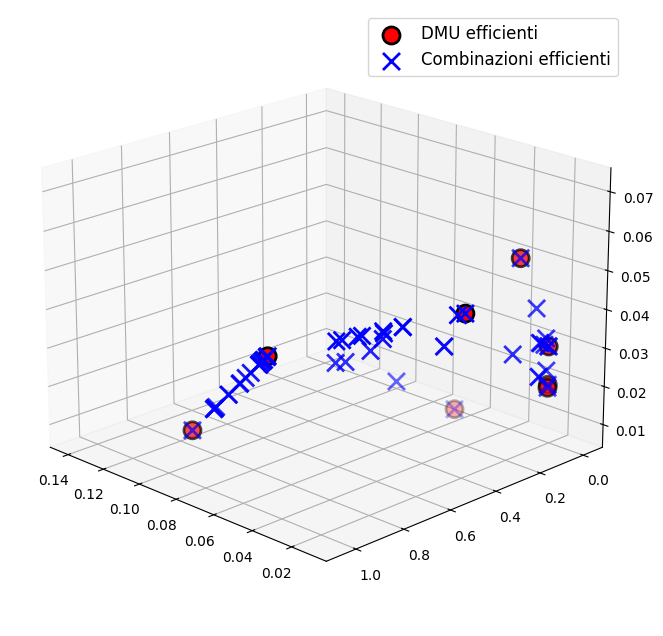

In [ ]:
# Creating a list of points for efficient DMUs (from the original dataframe)
eff_dmu_inputs = df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].iloc[
    [i for i, r in enumerate(dea.result) if r.score == 1]].to_numpy()  # Selection based on actual score
eff_dmu_outputs = df[["o_rendimentoatteso"]].iloc[
    [i for i, r in enumerate(dea.result) if r.score == 1]].to_numpy()

# Adding the points of the weighted combinations (from the df_new dataframe)
comb_eff_inputs = df_dmu_efficienti[["Weighted Standard Deviation", "Weighted Beta", "Weighted Entry Commission"]].to_numpy()
comb_eff_outputs = df_dmu_efficienti["Weighted Expected Return"].to_numpy()

# Counting the number of efficient and inefficient DMUs
num_eff_dmu = sum(1 for r in dea.result if r.score == 1)  # Efficient by score
num_ineff_dmu = sum(1 for r in dea.result if r.score < 1)  # Inefficient by score

# Verifying that the total number of DMUs is correct (52)
total_dmu = len(dea.result)

print(f"Total number of DMUs: {total_dmu}")
print(f"Number of efficient DMUs: {num_eff_dmu}")
print(f"Number of inefficient DMUs: {num_ineff_dmu}")

# Creating the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Displaying efficient DMUs (in red) and the new combinations of efficient DMUs (in blue)
ax.scatter(
    eff_dmu_inputs[:, 0], eff_dmu_inputs[:, 1], eff_dmu_inputs[:, 2],
    color="red", label="Efficient DMUs", marker="o", s=150, edgecolors="black", linewidths=2
)
ax.scatter(
    comb_eff_inputs[:, 0], comb_eff_inputs[:, 1], comb_eff_inputs[:, 2],
    color="blue", label="Efficient Combinations", marker="x", s=150, linewidths=2  # Removed `edgecolors`
)

# Axis labels
#ax.set_xlabel("Standard Deviation", fontsize=14, labelpad=12)
#ax.set_ylabel("Beta", fontsize=14, labelpad=12)
#ax.set_zlabel("Entry Commission", fontsize=14, labelpad=12)
#ax.set_title("Efficient Frontier with DMU Combinations", fontsize=16)

# Extracting values for automatic axis scaling
x_vals = np.concatenate((eff_dmu_inputs[:, 0], comb_eff_inputs[:, 0]))
y_vals = np.concatenate((eff_dmu_inputs[:, 1], comb_eff_inputs[:, 1]))
z_vals = np.concatenate((eff_dmu_inputs[:, 2], comb_eff_inputs[:, 2]))

# Auto-scaling to avoid cuts
ax.set_xlim(x1)
ax.set_ylim(x2)
ax.set_zlim(x3)

# Setting transparent background
fig.patch.set_alpha(0)  # Transparent background for the entire figure
ax.set_facecolor((0, 0, 0, 0))  # Transparent background for the axes

# Setting the 3D view for better readability
ax.view_init(elev=20, azim=135)  # Modify these values if you want a different perspective

# Aesthetic improvements
ax.legend(fontsize=12)
ax.grid(True)  # Adding a light grid to aid readability

# Saving the image with a transparent background
plt.savefig("transparent_graph_combinations.png", dpi=300, bbox_inches="tight", transparent=True)

# Displaying the graph
plt.show()